In [1]:
import pandas as pd

# Load the dataset
file_path = 'supermarket_sales - Sheet1.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Display basic information and descriptive statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [2]:
# Calculate the total sales for each product line
total_sales_by_product_line = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

print(total_sales_by_product_line)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


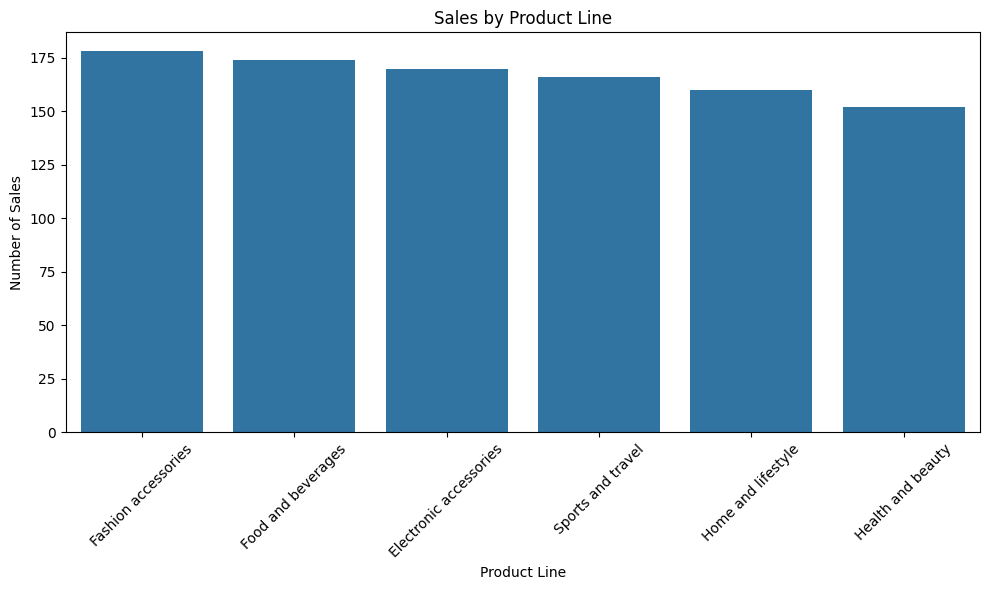

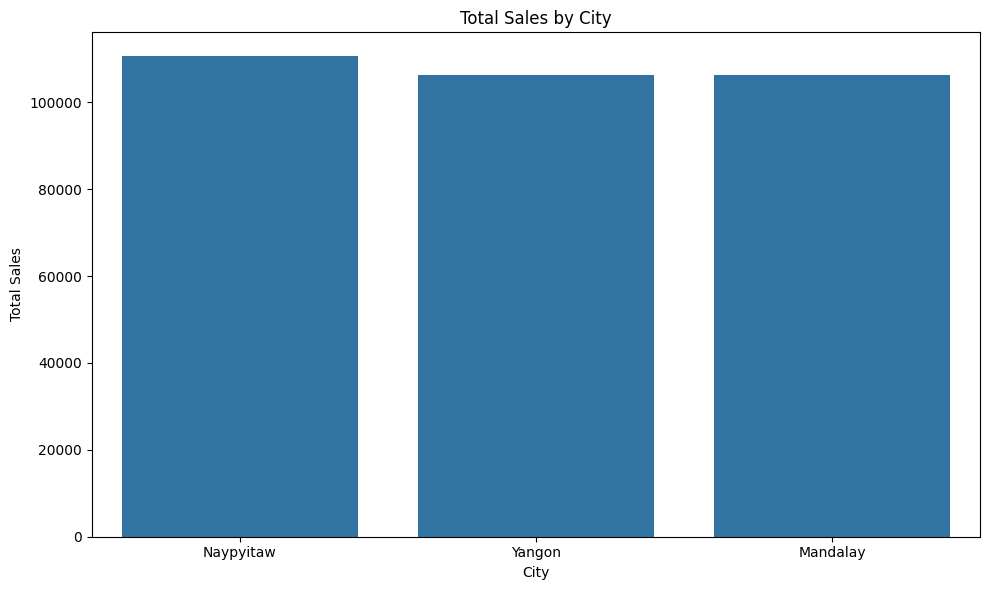

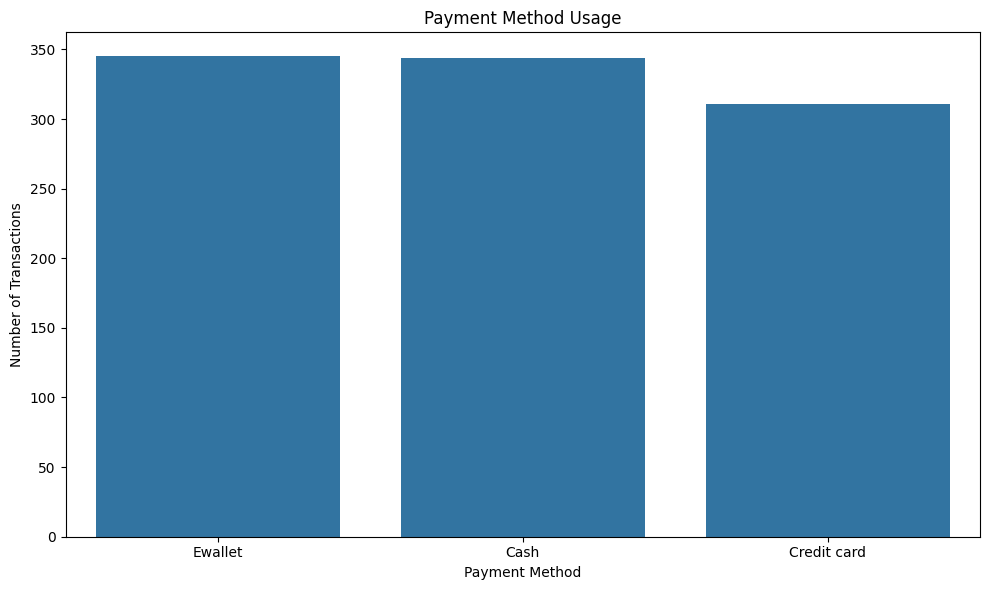

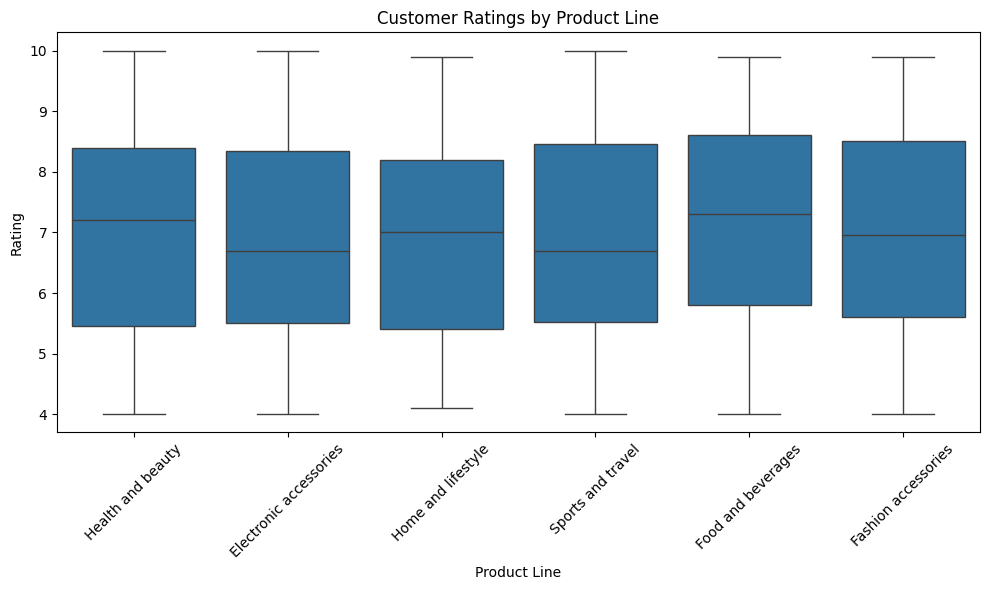

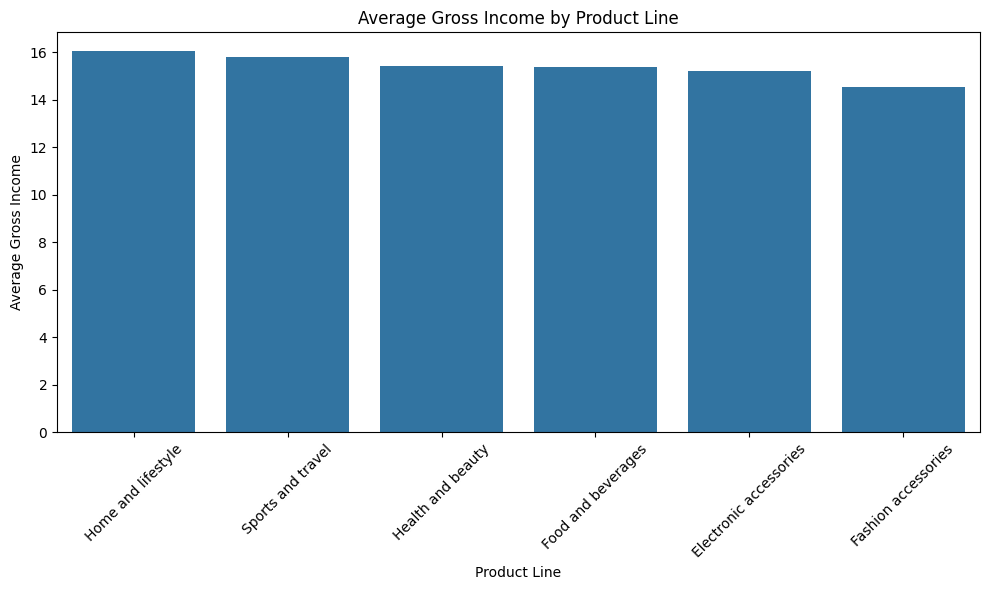

Visualizations created and saved.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'supermarket_sales - Sheet1.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Visualization 1: Sales by Product Line
plt.figure(figsize=(10, 6), facecolor='white')
sns.barplot(x=df['Product line'].value_counts().index, y=df['Product line'].value_counts().values)
plt.title('Sales by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Number of Sales')
plt.xlabel('Product Line')
plt.tight_layout()
plt.show()
plt.savefig('sales_by_product_line.png')
plt.close()

# Visualization 2: Total Sales by City
plt.figure(figsize=(10, 6), facecolor='white')
total_sales_by_city = df.groupby('City')['Total'].sum().sort_values(ascending=False)
sns.barplot(x=total_sales_by_city.index, y=total_sales_by_city.values)
plt.title('Total Sales by City')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.tight_layout()
plt.show()
plt.savefig('total_sales_by_city.png')
plt.close()

# Visualization 3: Payment Method Usage
plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(x='Payment', data=df)
plt.title('Payment Method Usage')
plt.ylabel('Number of Transactions')
plt.xlabel('Payment Method')
plt.tight_layout()
plt.show()
plt.savefig('payment_method_usage.png')
plt.close()

# Visualization 4: Customer Ratings by Product Line
plt.figure(figsize=(10, 6), facecolor='white')
sns.boxplot(x='Product line', y='Rating', data=df)
plt.title('Customer Ratings by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Rating')
plt.xlabel('Product Line')
plt.tight_layout()
plt.show()
plt.savefig('customer_ratings_by_product_line.png')
plt.close()

# Visualization 5: Average Gross Income by Product Line
plt.figure(figsize=(10, 6), facecolor='white')
average_gross_income_by_product_line = df.groupby('Product line')['gross income'].mean().sort_values(ascending=False)
sns.barplot(x=average_gross_income_by_product_line.index, y=average_gross_income_by_product_line.values)
plt.title('Average Gross Income by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Average Gross Income')
plt.xlabel('Product Line')
plt.tight_layout()
plt.show()
plt.savefig('average_gross_income_by_product_line.png')
plt.close()

print('Visualizations created and saved.')

<ipython-input-5-8e59c10c0257>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sports_travel['Month'] = df_sports_travel['Date'].dt.month


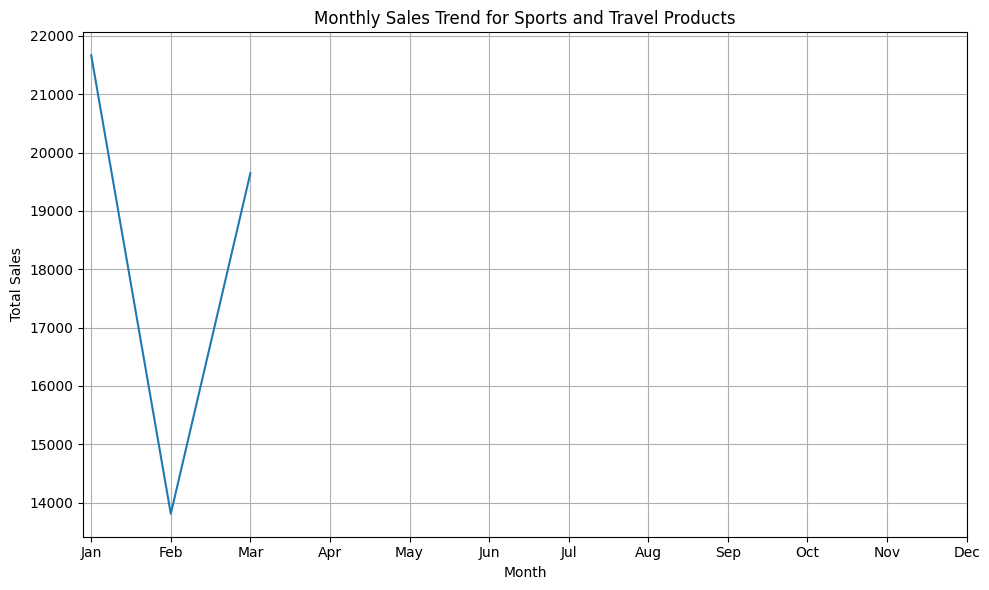

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Load the dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv', encoding='ascii')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter for 'Sports and travel' product line
df_sports_travel = df[df['Product line'] == 'Sports and travel']

# Group by month to see trends
df_sports_travel['Month'] = df_sports_travel['Date'].dt.month
monthly_sales = df_sports_travel.groupby('Month')['Total'].sum()

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend for Sports and Travel Products')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-6-6648fe13ea14>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_sports_travel, ax=axes[0], palette='coolwarm')
<ipython-input-6-6648fe13ea14>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer type', data=df_sports_travel, ax=axes[1], palette='coolwarm')


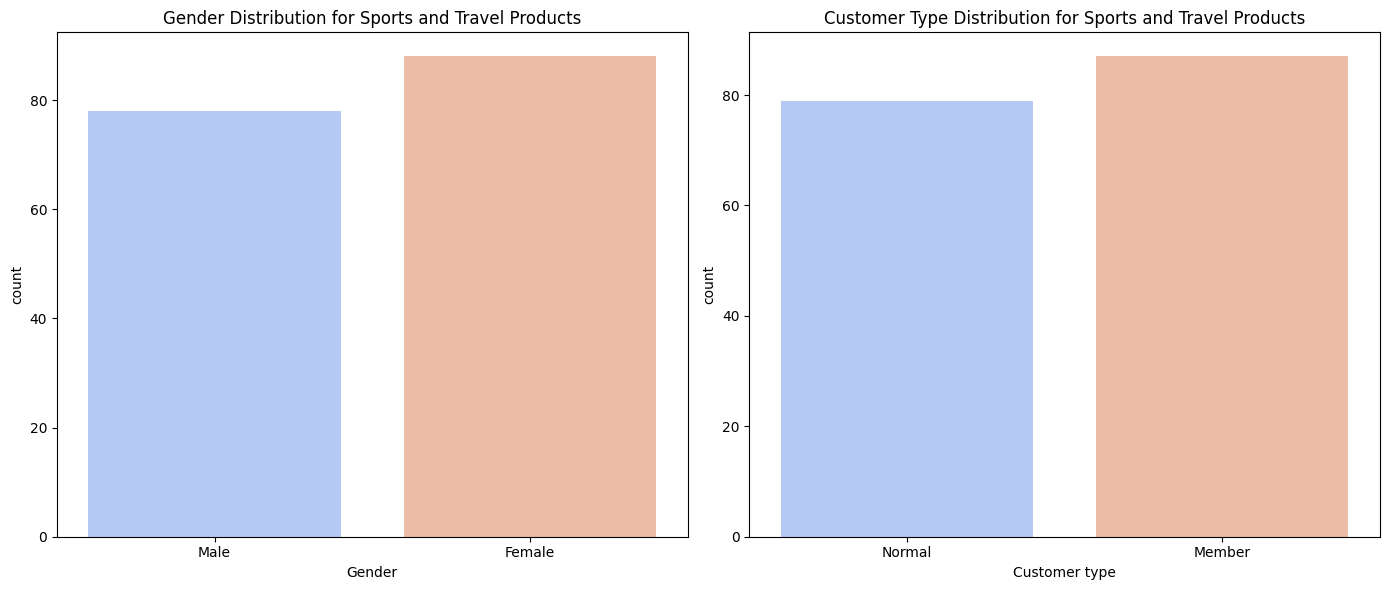

In [6]:
df_sports_travel = df[df['Product line'] == 'Sports and travel']

# Plotting customer demographics
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')

# Gender distribution
sns.countplot(x='Gender', data=df_sports_travel, ax=axes[0], palette='coolwarm')
axes[0].set_title('Gender Distribution for Sports and Travel Products')

# Customer type distribution
sns.countplot(x='Customer type', data=df_sports_travel, ax=axes[1], palette='coolwarm')
axes[1].set_title('Customer Type Distribution for Sports and Travel Products')

plt.tight_layout()
plt.show()